In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
index_train_last = 1459

In [6]:
df_train_test = pd.concat([df_train,df_test],axis=0)
df_train_test.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 81)

In [11]:
df_train_test.iloc[1459:1465]['SalePrice']

1459    147500.0
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
Name: SalePrice, dtype: float64

In [15]:
columns_obj = list(df_train_test.select_dtypes(include=['object']).columns)
columns_non_obj = list(df_train_test.select_dtypes(exclude=['object']).columns)
len(columns_obj)+len(columns_non_obj)

81

In [17]:
df_train[columns_non_obj].corr()['SalePrice'] 


1stFlrSF         0.605852
2ndFlrSF         0.319334
3SsnPorch        0.044584
BedroomAbvGr     0.168213
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
BsmtUnfSF        0.214479
EnclosedPorch   -0.128578
Fireplaces       0.466929
FullBath         0.560664
GarageArea       0.623431
GarageCars       0.640409
GarageYrBlt      0.486362
GrLivArea        0.708624
HalfBath         0.284108
Id              -0.021917
KitchenAbvGr    -0.135907
LotArea          0.263843
LotFrontage      0.351799
LowQualFinSF    -0.025606
MSSubClass      -0.084284
MasVnrArea       0.477493
MiscVal         -0.021190
MoSold           0.046432
OpenPorchSF      0.315856
OverallCond     -0.077856
OverallQual      0.790982
PoolArea         0.092404
SalePrice        1.000000
ScreenPorch      0.111447
TotRmsAbvGrd     0.533723
TotalBsmtSF      0.613581
WoodDeckSF       0.324413
YearBuilt        0.522897
YearRemodAdd     0.507101
YrSold          -0.028923
Name: SalePr

#Decided to select All Non-Cat Columns

In [19]:
df_train_test[columns_non_obj].isna().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9EFD9BEB8>,
      dtype=object)

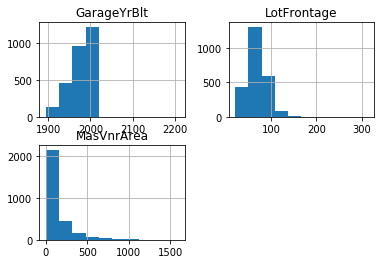

In [21]:
df_train_test[['GarageYrBlt','LotFrontage','MasVnrArea']].hist()

#Decided to fill using mode

In [35]:
temp = df_train_test[columns_non_obj].isna().sum()[df_train_test[columns_non_obj].isna().sum()>0].index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9EFD83780>,
      dtype=object)

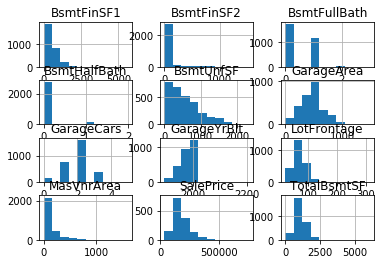

In [39]:
df_train_test[list(temp)].hist()

In [45]:
val = df_train['BsmtUnfSF'].mean()
df_train_test['BsmtUnfSF'].fillna(value = val,inplace=True)

In [47]:
df_train_test['BsmtUnfSF'].isna().sum()

0

In [51]:
df_train_test['GarageArea'].fillna(value = df_train['GarageArea'].mean(),inplace=True)
df_train_test['GarageYrBlt'].fillna(value = df_train['GarageYrBlt'].mean(),inplace=True)
df_train_test['BsmtFinSF1'].fillna(value = df_train['BsmtFinSF1'].mode()[0],inplace=True)
df_train_test['BsmtFinSF2'].fillna(value = df_train['BsmtFinSF2'].mode()[0],inplace=True)
df_train_test['BsmtFullBath'].fillna(value = df_train['BsmtFullBath'].mode()[0],inplace=True)
df_train_test['BsmtHalfBath'].fillna(value = df_train['BsmtHalfBath'].mode()[0],inplace=True)
df_train_test['GarageCars'].fillna(value = df_train['GarageCars'].mean(),inplace=True)
df_train_test['LotFrontage'].fillna(value = df_train['LotFrontage'].mode()[0],inplace=True)
df_train_test['MasVnrArea'].fillna(value = df_train['MasVnrArea'].mode()[0],inplace=True)
df_train_test['TotalBsmtSF'].fillna(value = df_train['TotalBsmtSF'].mean(),inplace=True)

In [52]:
df_train_test[temp].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 12 columns):
BsmtFinSF1      2919 non-null float64
BsmtFinSF2      2919 non-null float64
BsmtFullBath    2919 non-null float64
BsmtHalfBath    2919 non-null float64
BsmtUnfSF       2919 non-null float64
GarageArea      2919 non-null float64
GarageCars      2919 non-null float64
GarageYrBlt     2919 non-null float64
LotFrontage     2919 non-null float64
MasVnrArea      2919 non-null float64
SalePrice       1460 non-null float64
TotalBsmtSF     2919 non-null float64
dtypes: float64(12)
memory usage: 376.5 KB


In [53]:
df_train_test[columns_non_obj].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 38 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null int64
Fireplaces       2919 non-null int64
FullBath         2919 non-null int64
GarageArea       2919 non-null float64
GarageCars       2919 non-null float64
GarageYrBlt      2919 non-null float64
GrLivArea        2919 non-null int64
HalfBath         2919 non-null int64
Id               2919 non-null int64
KitchenAbvGr     2919 non-null int64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MSSubClass       2919 non-null int64
MasVnrArea       2919 no

In [54]:
df_train_test[columns_non_obj].corr()['SalePrice']

1stFlrSF         0.605852
2ndFlrSF         0.319334
3SsnPorch        0.044584
BedroomAbvGr     0.168213
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
BsmtUnfSF        0.214479
EnclosedPorch   -0.128578
Fireplaces       0.466929
FullBath         0.560664
GarageArea       0.623431
GarageCars       0.640409
GarageYrBlt      0.470177
GrLivArea        0.708624
HalfBath         0.284108
Id              -0.021917
KitchenAbvGr    -0.135907
LotArea          0.263843
LotFrontage      0.329220
LowQualFinSF    -0.025606
MSSubClass      -0.084284
MasVnrArea       0.472614
MiscVal         -0.021190
MoSold           0.046432
OpenPorchSF      0.315856
OverallCond     -0.077856
OverallQual      0.790982
PoolArea         0.092404
SalePrice        1.000000
ScreenPorch      0.111447
TotRmsAbvGrd     0.533723
TotalBsmtSF      0.613581
WoodDeckSF       0.324413
YearBuilt        0.522897
YearRemodAdd     0.507101
YrSold          -0.028923
Name: SalePr

In [55]:
df_train_test[columns_obj].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 43 columns):
Alley            198 non-null object
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtQual         2838 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
Fence            571 non-null object
FireplaceQu      1499 non-null object
Foundation       2919 non-null object
Functional       2917 non-null object
GarageCond       2760 non-null object
GarageFinish     2760 non-null object
GarageQual       2760 non-null object
GarageType       2762 non-null object
Heating          2919

In [68]:
df_temp_train = pd.read_csv('../train.csv')
df_temp_test = pd.read_csv('../test.csv')

In [67]:
for col in columns_obj:
    print(col,df_temp_train[col].unique())

Alley ['NotApp' 'Grvl' 'Pave']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
BsmtCond ['TA' 'Gd' 'NotApp' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NotApp']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NotApp' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'NotApp' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' 'NotApp' 'Fa']
CentralAir ['Y' 'N']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NotApp']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Fence ['NotApp' 'MnPrv' 'GdWo' 'GdPrv' 

In [69]:
for col in columns_obj:
    print(col,df_temp_test[col].unique())

Alley ['NotApp' 'Pave' 'Grvl']
BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
BsmtCond ['TA' 'Po' 'Fa' 'Gd' 'NotApp']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NotApp']
BsmtFinType1 ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' 'NotApp']
BsmtFinType2 ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' 'NotApp']
BsmtQual ['TA' 'Gd' 'Ex' 'Fa' 'NotApp']
CentralAir ['Y' 'N']
Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual ['TA' 'Gd' 'Ex' 'Fa']
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'NotApp' 'CBlock']
Exterior2nd ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn'
 'NotApp' 'Stone']
Fence ['MnPrv' 'NotApp' 'GdPrv' 'GdWo' 'MnWw']
FireplaceQu ['NotApp' 'TA' 'Gd' 'Po' 

In [75]:
df_temp_murged = pd.concat([df_temp_train,df_temp_test],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [77]:
df_temp_murged[columns_obj].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 43 columns):
Alley            2919 non-null object
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtQual         2919 non-null object
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
Fence            2919 non-null object
FireplaceQu      2919 non-null object
Foundation       2919 non-null object
Functional       2919 non-null object
GarageCond       2919 non-null object
GarageFinish     2919 non-null object
GarageQual       2919 non-null object
GarageType       2919 non-null object
Heating          29

In [79]:
df_one_hot = pd.get_dummies(df_temp_murged[columns_obj],prefix=columns_obj)

In [81]:
df_one_hot.shape

(2919, 275)

In [83]:
df_one_hot['SalePrice'] = df_train_test['SalePrice']

In [106]:
A_high = df_one_hot.iloc[:index_train_last+1].corr()['SalePrice'][df_one_hot.iloc[:index_train_last+1].corr()['SalePrice']>0.05].index 
A_less = df_one_hot.iloc[:index_train_last+1].corr()['SalePrice'][df_one_hot.iloc[:index_train_last+1].corr()['SalePrice']<-0.05].index


In [89]:
df_one_hot.drop(['Utilities_NotApp','SaleType_NotApp'])

1

In [110]:
len(A_less)

101

In [109]:
len(A_high)

64

In [111]:
columns_selected_onehot = list(A_high)+list(A_less)

In [119]:
columns_selected_onehot.remove('SalePrice')
len(columns_selected_onehot)

164

In [114]:
B_less = df_train[columns_non_obj].corr()['SalePrice'][df_train[columns_non_obj].corr()['SalePrice']<-0.05].index
B_high = df_train[columns_non_obj].corr()['SalePrice'][df_train[columns_non_obj].corr()['SalePrice']>0.05].index

In [115]:
len(B_less) + len(B_high)

30

In [116]:
len(columns_non_obj)

38

In [117]:
columns_selected_non_obj = list(B_high)+list(B_less)

In [120]:
columns_selected_non_obj.remove('SalePrice')
len(columns_selected_non_obj)

29

In [126]:
df_processed = pd.concat([df_train_test[columns_selected_non_obj+['SalePrice']],df_one_hot[columns_selected_onehot]],axis=1)

In [127]:
df_processed.shape

(2919, 194)

In [131]:
df_processed.iloc[:index_train_last+1].corr()['SalePrice']

1stFlrSF                 0.605852
2ndFlrSF                 0.319334
BedroomAbvGr             0.168213
BsmtFinSF1               0.386420
BsmtFullBath             0.227122
BsmtUnfSF                0.214479
Fireplaces               0.466929
FullBath                 0.560664
GarageArea               0.623431
GarageCars               0.640409
GarageYrBlt              0.470177
GrLivArea                0.708624
HalfBath                 0.284108
LotArea                  0.263843
LotFrontage              0.329220
MasVnrArea               0.472614
OpenPorchSF              0.315856
OverallQual              0.790982
PoolArea                 0.092404
ScreenPorch              0.111447
TotRmsAbvGrd             0.533723
TotalBsmtSF              0.613581
WoodDeckSF               0.324413
YearBuilt                0.522897
YearRemodAdd             0.507101
EnclosedPorch           -0.128578
KitchenAbvGr            -0.135907
MSSubClass              -0.084284
OverallCond             -0.077856
SalePrice     

In [129]:
df_processed.to_csv('Processed_27.csv',index=False)

In [ ]:
X_train = df_processed.iloc[:index_train_last]